<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/ML/Projects/Electro-Pi-projects/Simple%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression


## All Packages you need for this 

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [10]:
import os
os.chdir('drive/MyDrive/Fusion/')

In [14]:
!ls

50_Startups.csv  diabetes_null.csv  Salary_Data.csv
boston.csv	 Insurance.xlsx     unprocessed_data.csv


In [15]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import sklearn
import xlrd

# Pre Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Error Metrics 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regressors
from sklearn.linear_model import LinearRegression

## 1. Specify The Goal of Your Project / Model and Highlight it

>  (e.g. : Predict  Number of Eggs That a New Customer would eat per day )


### Learn how to use [Mark Down](https://www.markdowntutorial.com/) Techniques  to use it for collecting your insights and make your notebook pretty! 

## 2. Load The Data into a Pandas Frame

In [21]:
# For CSV File
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# 3. Perform Data Exploratory Analysis
##   Pandas Routine 
####  [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) for Data Wrangling 

In [24]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Check For Missing Data 

In [19]:
print(df.isnull().sum().sort_values(ascending=False))

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


### Drop Rows with None Values 

In [23]:
df=df.dropna()
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Describe Your Data


In [25]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Seaborn Routine

### Heat Map

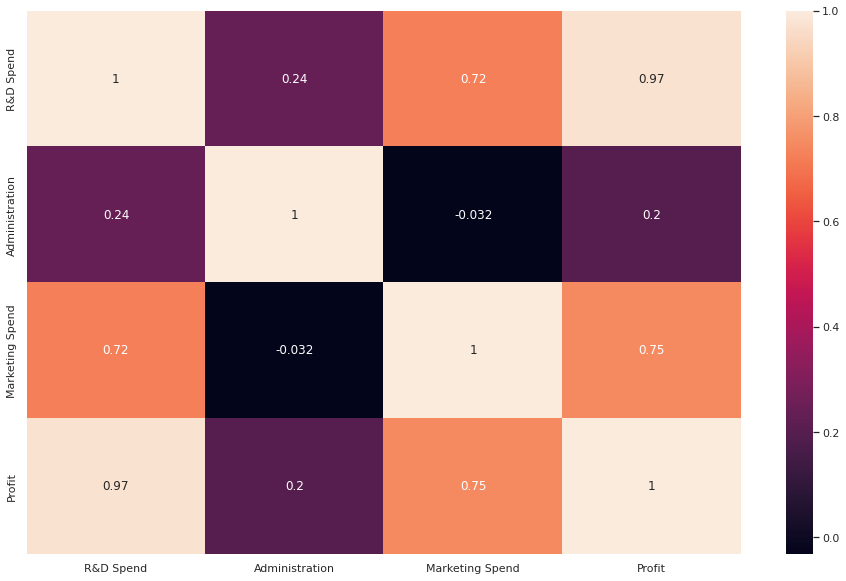

In [26]:
plt.figure(figsize = (16,10))
sns_plot=sns.heatmap(df.corr(),annot= True)
plt.show()


>  Look at Administration  Column its low Correlation

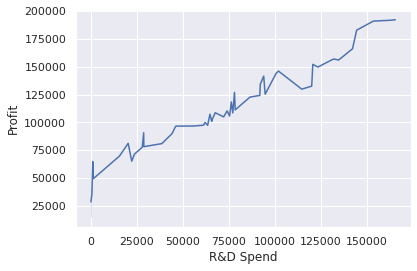

In [27]:
sns_plot = sns.lineplot(x='R&D Spend', y='Profit', data=df)
#sns_plot.figure.savefig("Work Ethics with Total Hours")

> yes  yes  ... All Females Survived Except one 

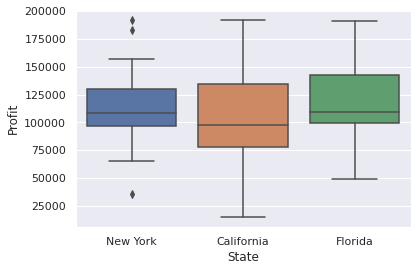

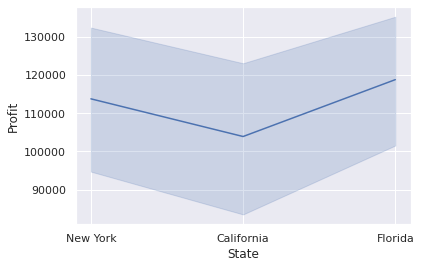

In [28]:
plot = sns.boxplot(x='State', y='Profit', data=df)
plt.show()
_ = sns.lineplot(x='State', y='Profit', data=df)

# 4. Data Preprocessing
#### Categorical Data Handling

In [29]:
df=pd.get_dummies(df)
df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


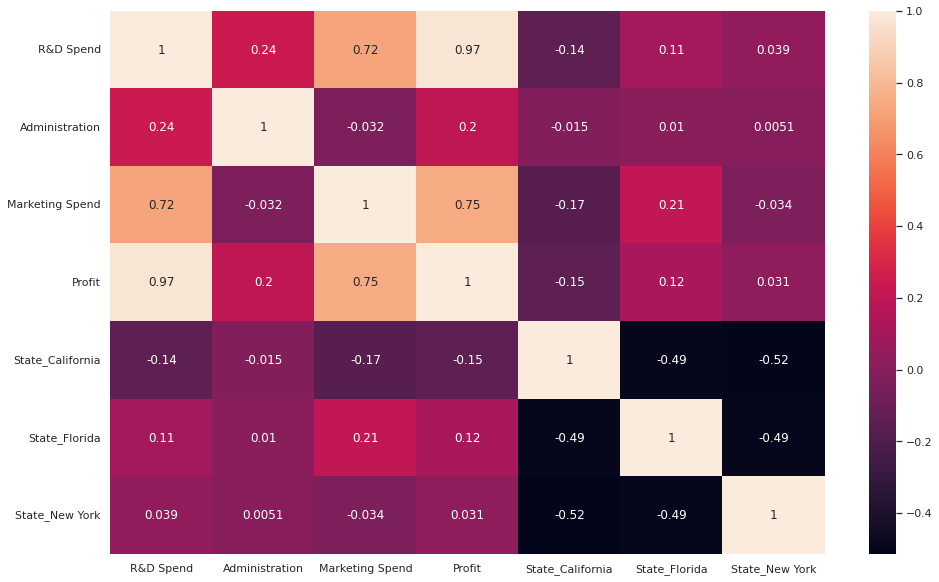

In [30]:
plt.figure(figsize = (16,10))
sns_plot=sns.heatmap(df.corr(),annot= True)
plt.show()


## Splitting Data 

In [32]:
y=df['Profit']
X=df.drop(['Profit'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [33]:
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.25, random_state=42)

## Normalization

In [34]:
data=df.values
data

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 1.9226183e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.9179206e+05,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.9105039e+05,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 1.8290199e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.6618794e+05,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 1.5699112e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.5612251e+05,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 1.5575260e+05,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.2054252e+05, 1

In [35]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

np.min(X_train)

0.0

## Standardization

In [36]:
data

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 1.9226183e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.9179206e+05,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.9105039e+05,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 1.8290199e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.6618794e+05,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 1.5699112e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.5612251e+05,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 1.5575260e+05,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.2054252e+05, 1

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

np.std(X_train)

1.0

# 5. Training Process

## Multiple Linear Regression

In [38]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# 6. Model Evaluation

In [39]:
y_pred=lr.predict(X_test)
y_pred

array([126464.76354539,  85538.22928108,  99367.07880812,  45864.36860436,
       128321.87763051,  51947.22582106, 108901.08466238, 100508.67082733,
        97668.72028982, 112423.71311462, 128907.87800423, 174736.83458726,
        93516.90479145])

In [40]:
mean_squared_error(y_pred,y_test)

86972050.78605853

In [41]:
r2_score(y_test,y_pred)

0.9190778286373352